# Part 1

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize

In [58]:
np.random.seed(16)

In [59]:
# Parameters
theta1 = 0.7
theta2 = 0.8
theta3 = 3.0
theta4 = -0.34


Delta = 2**(-9)       # time step
T = 100               # total time
N = int(T / Delta)    # number of steps

# Time grid
t = np.linspace(0, T, N+1)

# Initial conditions
Y10 = -1.9
Y20 = 1.2

# sigma values
sigmas = [0, 0.10, 0.20, 0.30, 0.40]

In [60]:
# Euler–Maruyama simulation of the 2D neuron system

def simulate_sigma(sigma):
    Y1 = np.zeros(N+1)
    Y2 = np.zeros(N+1)

    Y1[0] = Y10
    Y2[0] = Y20

    # simulate
    for n in range(N):
        dW = np.sqrt(Delta) * np.random.randn()  # Normal(0, Delta)

        
        Y1[n+1] = (Y1[n] 
                   + theta3 * (Y1[n] + Y2[n] - (1/3)*Y1[n]**3 + theta4) * Delta
                   + sigma * dW)

        Y2[n+1] = (Y2[n] 
                   - (1/theta3) * (Y1[n] + theta2 * Y2[n] - theta1) * Delta)

    return Y1, Y2


Simulating sigma = 0


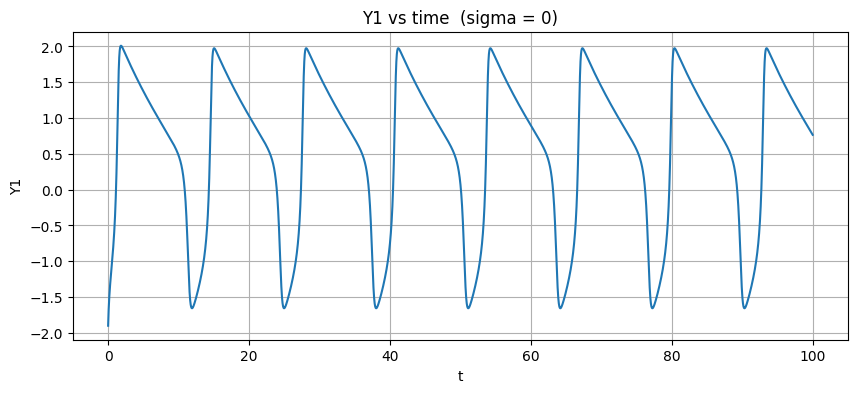

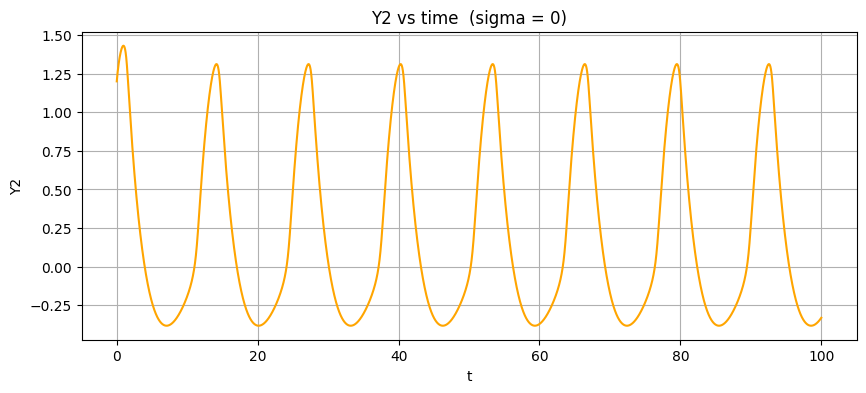

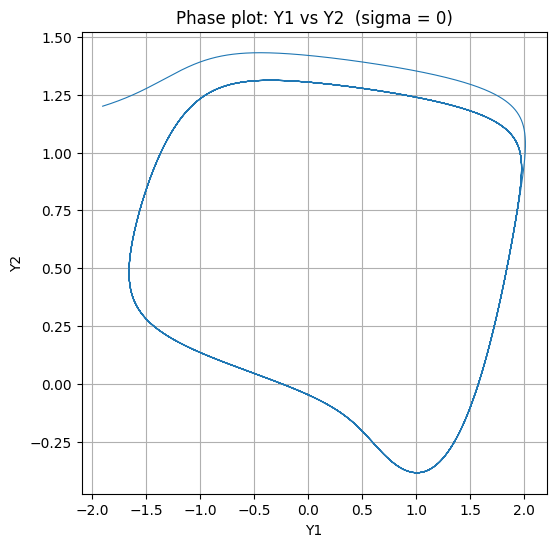


Simulating sigma = 0.1


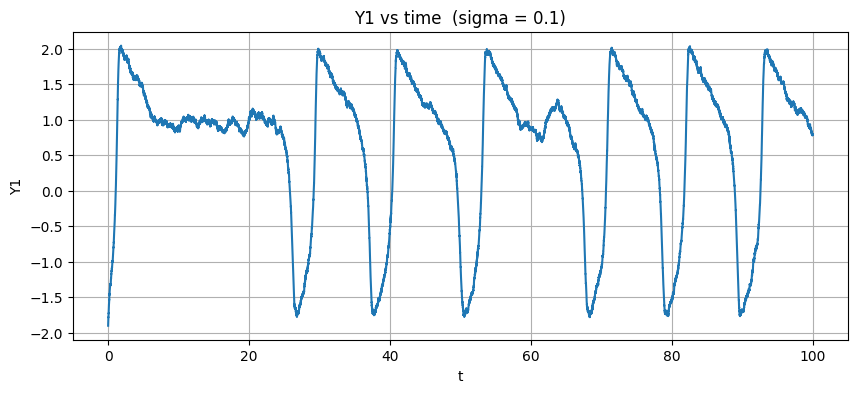

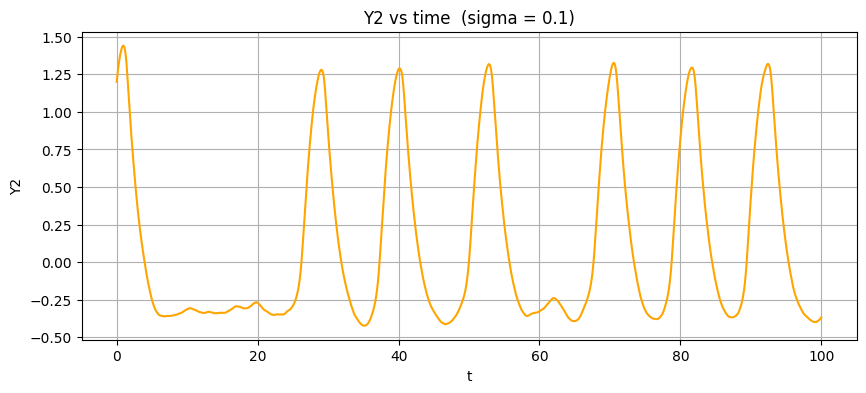

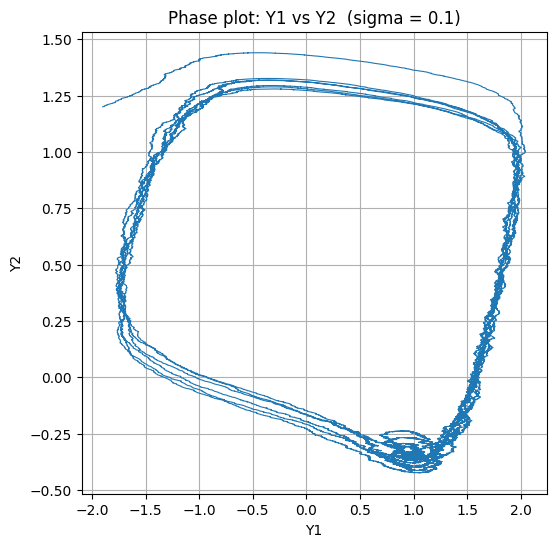


Simulating sigma = 0.2


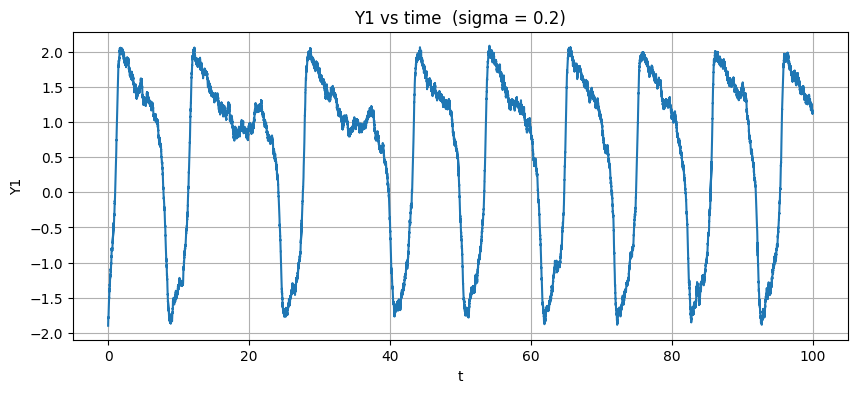

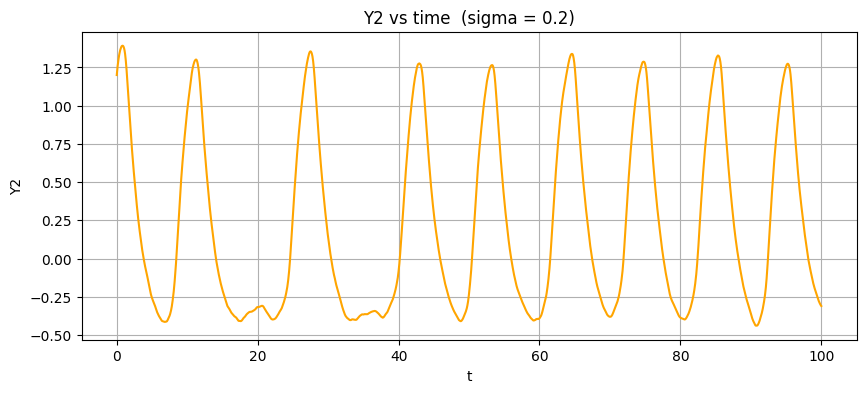

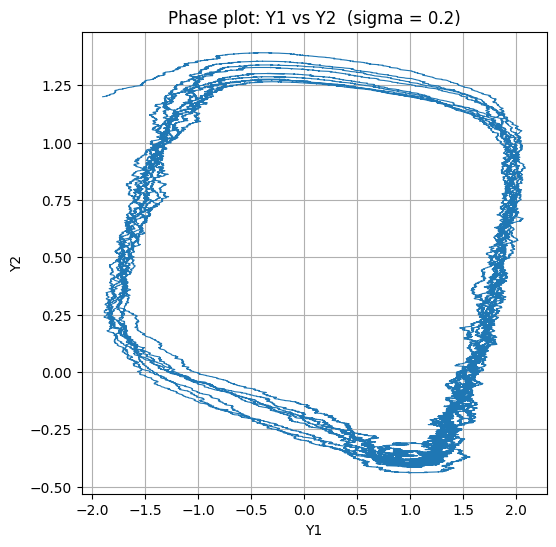


Simulating sigma = 0.3


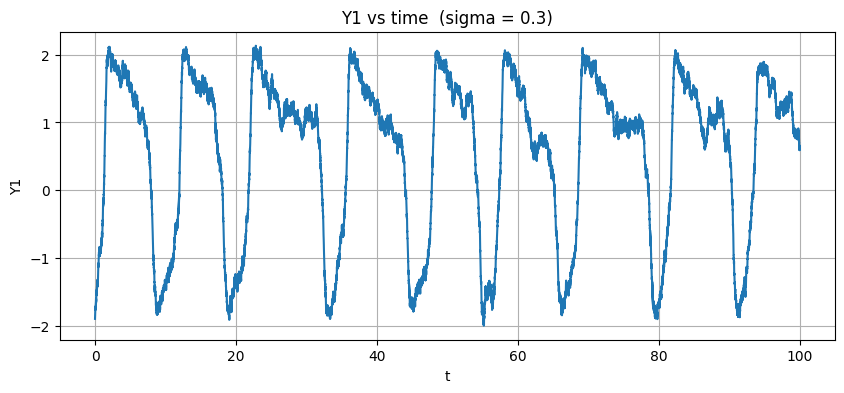

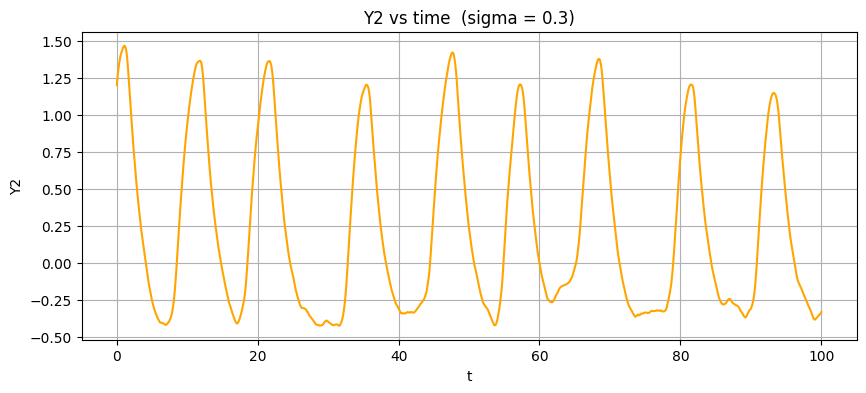

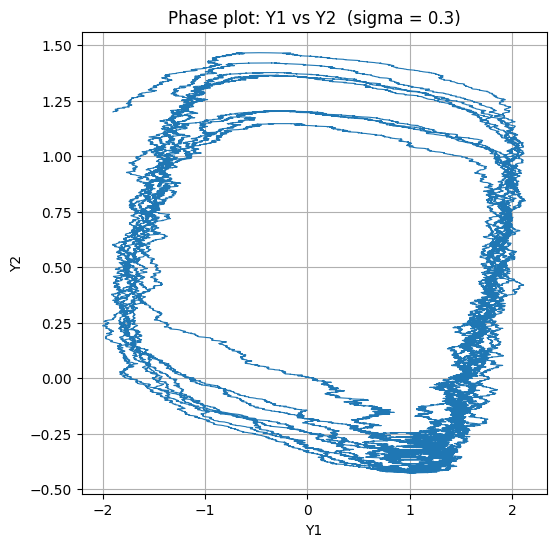


Simulating sigma = 0.4


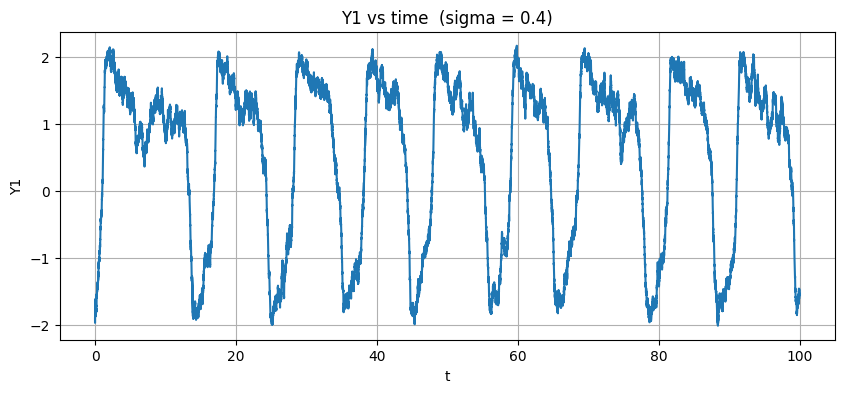

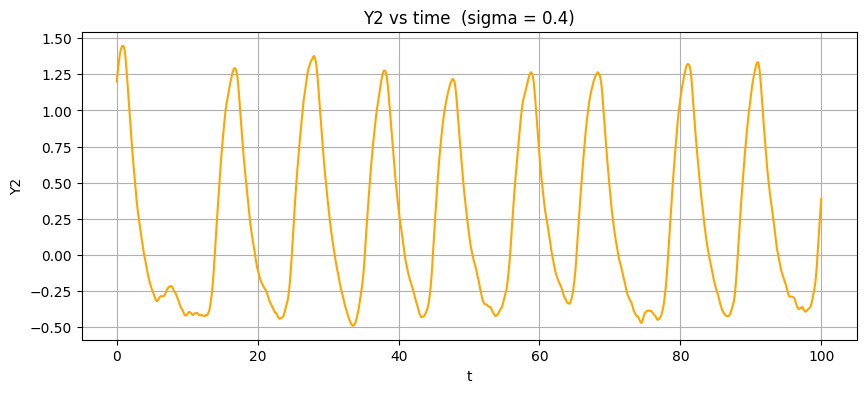

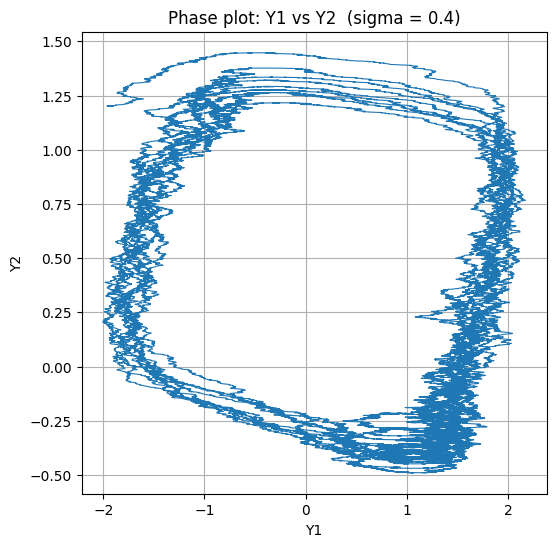

In [61]:
for sigma in sigmas:
    print(f"\nSimulating sigma = {sigma}")

    Y1, Y2 = simulate_sigma(sigma)

    # --- Plot 1: Y1 vs time ---
    plt.figure(figsize=(10,4))
    plt.plot(t, Y1)
    plt.title(f"Y1 vs time  (sigma = {sigma})")
    plt.xlabel("t")
    plt.ylabel("Y1")
    plt.grid(True)
    plt.show()

    # --- Plot 2: Y2 vs time ---
    plt.figure(figsize=(10,4))
    plt.plot(t, Y2, color='orange')
    plt.title(f"Y2 vs time  (sigma = {sigma})")
    plt.xlabel("t")
    plt.ylabel("Y2")
    plt.grid(True)
    plt.show()

    # --- Plot 3: Phase plot ---
    plt.figure(figsize=(6,6))
    plt.plot(Y1, Y2, linewidth=0.8)
    plt.title(f"Phase plot: Y1 vs Y2  (sigma = {sigma})")
    plt.xlabel("Y1")
    plt.ylabel("Y2")
    plt.grid(True)
    plt.show()

In [ ]:
def plot_2d_hist(Y1, Y2, sigma, bins=100):

    counts, xedges, yedges = np.histogram2d(Y1, Y2, bins=bins)

    x_idx = np.digitize(Y1, xedges) - 1
    y_idx = np.digitize(Y2, yedges) - 1

    x_idx = np.clip(x_idx, 0, bins - 1)
    y_idx = np.clip(y_idx, 0, bins - 1)

    # Get count for each point
    point_counts = counts[x_idx, y_idx]

    plt.figure(figsize=(7, 6))
    plt.scatter(Y1, Y2, c=point_counts, s=1, cmap='viridis')
    plt.title(f"2D Histogram Counts (sigma = {sigma})")
    plt.xlabel("Y1")
    plt.ylabel("Y2")
    plt.colorbar(label="Count")
    plt.show()


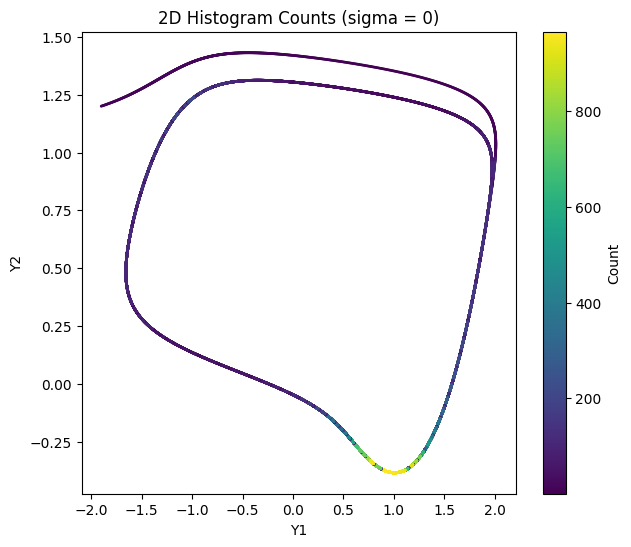

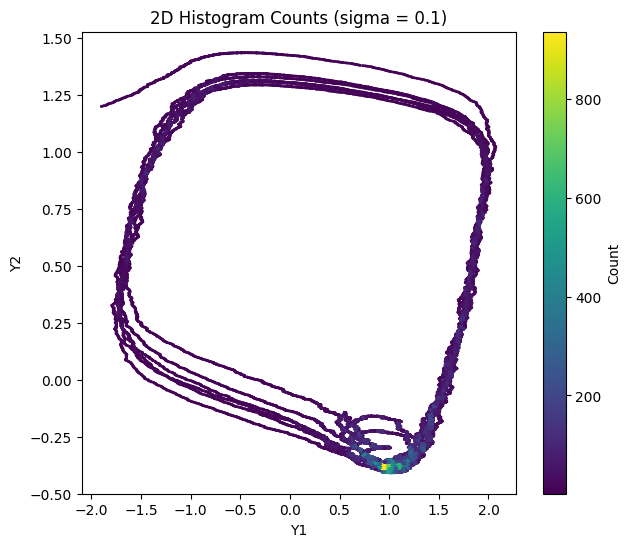

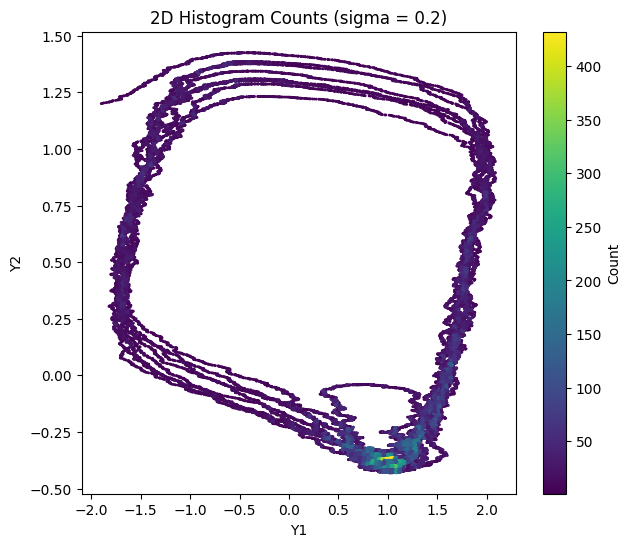

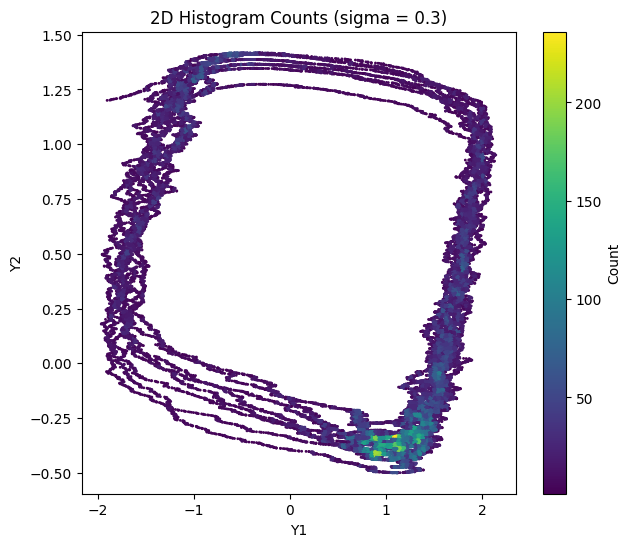

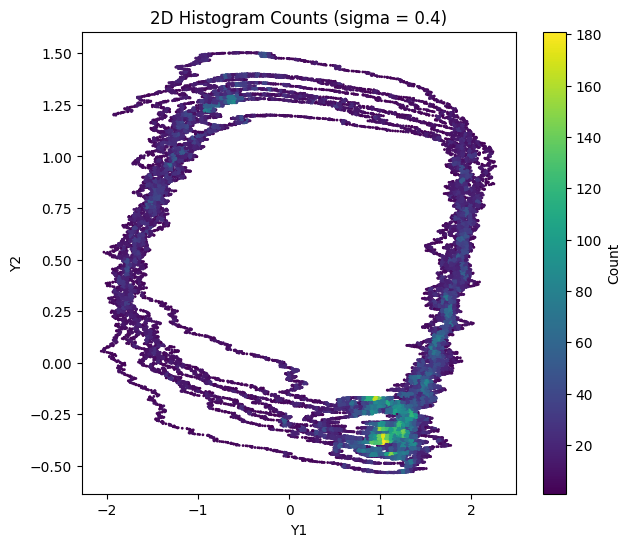

In [63]:
for sigma in sigmas:
    Y1, Y2 = simulate_sigma(sigma)
    plot_2d_hist(Y1, Y2, sigma)


In [ ]:
def plot_3d_hist(Y1, Y2, sigma, bins=100):
    counts, xedges, yedges = np.histogram2d(Y1, Y2, bins=bins)

    # Bin centers 
    xcenters = 0.5 * (xedges[:-1] + xedges[1:])
    ycenters = 0.5 * (yedges[:-1] + yedges[1:])
    Xc, Yc = np.meshgrid(xcenters, ycenters)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(Xc, Yc, counts.T, rstride=1, cstride=1, cmap='viridis')
    ax.set_title(f"3D histogram of (Y1, Y2) (sigma = {sigma})")
    ax.set_xlabel("Y1")
    ax.set_ylabel("Y2")
    ax.set_zlabel("Count")

    plt.show()



3D histogram for sigma = 0


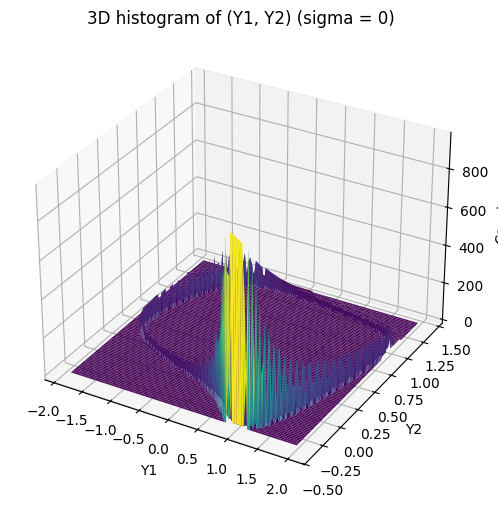


3D histogram for sigma = 0.1


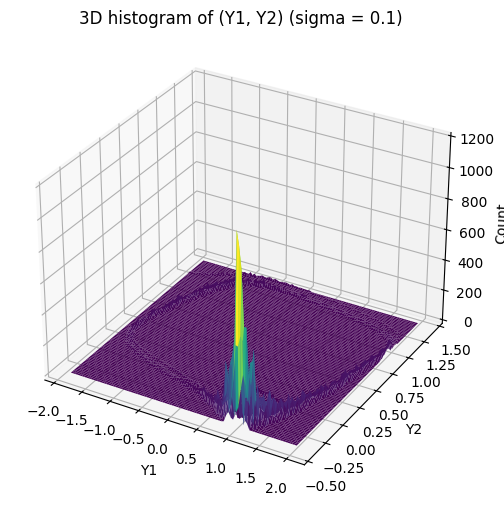


3D histogram for sigma = 0.2


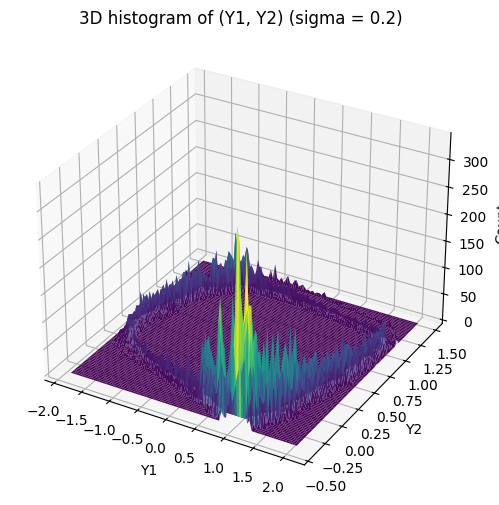


3D histogram for sigma = 0.3


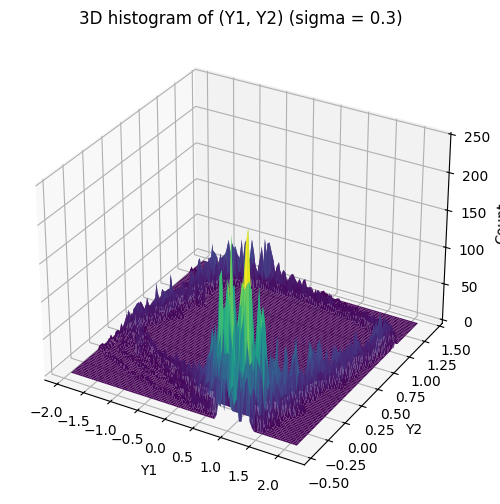


3D histogram for sigma = 0.4


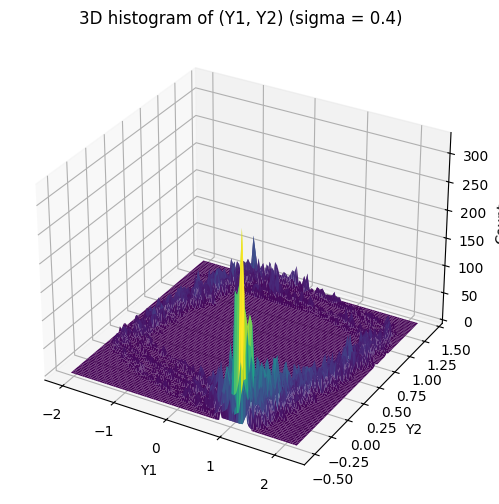

In [65]:
for sigma in sigmas:
    print(f"\n3D histogram for sigma = {sigma}")
    Y1, Y2 = simulate_sigma(sigma)
    plot_3d_hist(Y1, Y2, sigma)

In [ ]:
def plot_3d_time_colored(Y1, Y2, sigma):
    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(111, projection='3d')

    norm = Normalize(vmin=t.min(), vmax=t.max())
    colors = cm.plasma(norm(t))  

    for i in range(len(t) - 1):
        ax.plot(
            Y1[i:i+2],
            Y2[i:i+2],
            t[i:i+2],
            color=colors[i],
            linewidth=1.2
        )

    ax.set_title(f"3D trajectory (Y1, t, Y2) for sigma = {sigma}")
    ax.set_xlabel("Y1")
    ax.set_ylabel("Y2")
    ax.set_zlabel("t")

    #colourbar
    sm = cm.ScalarMappable(cmap=cm.plasma, norm=norm)
    sm.set_array([])  
    cbar = fig.colorbar(sm, ax=ax, shrink=0.7, pad=0.12)
    cbar.set_label("Time")

    plt.tight_layout()
    plt.show()


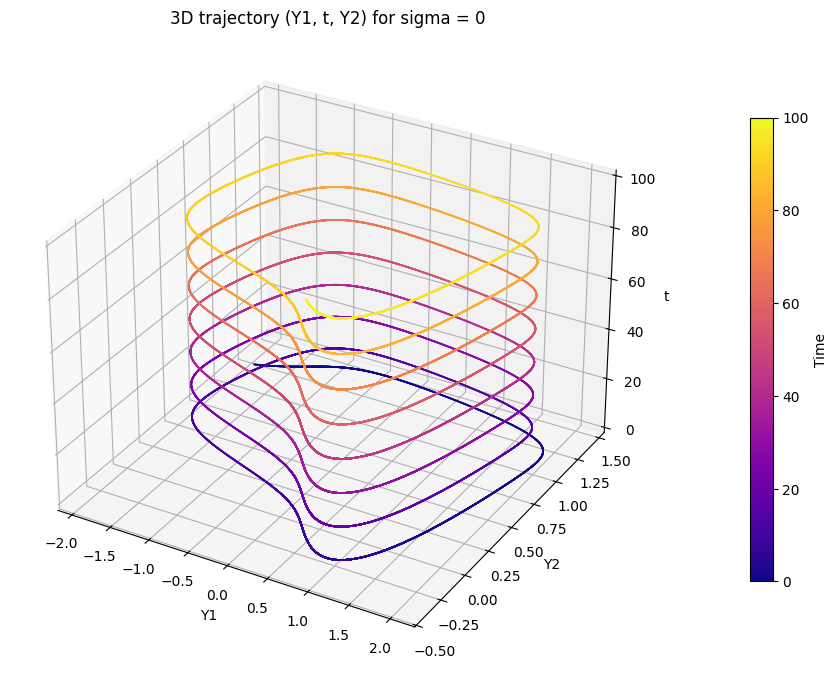

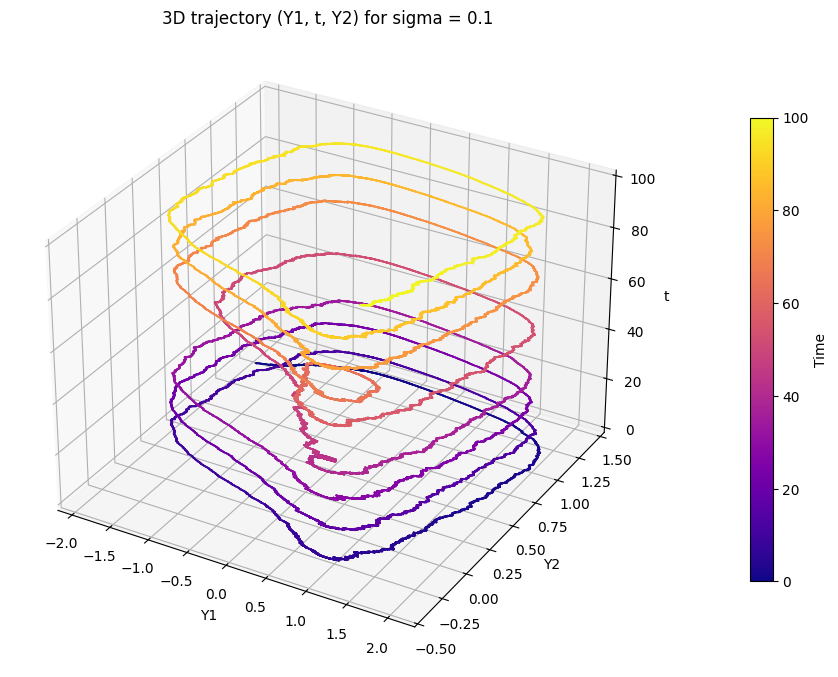

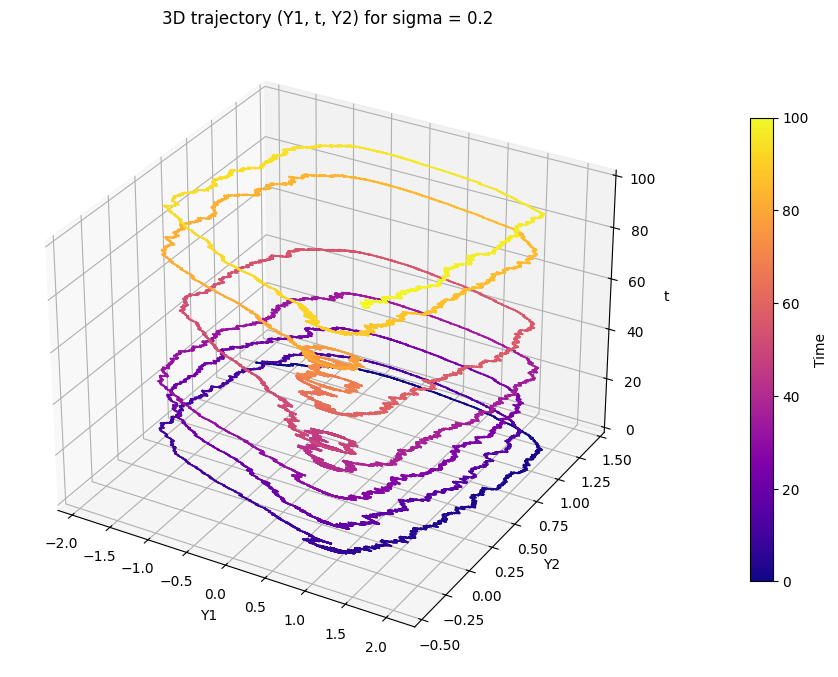

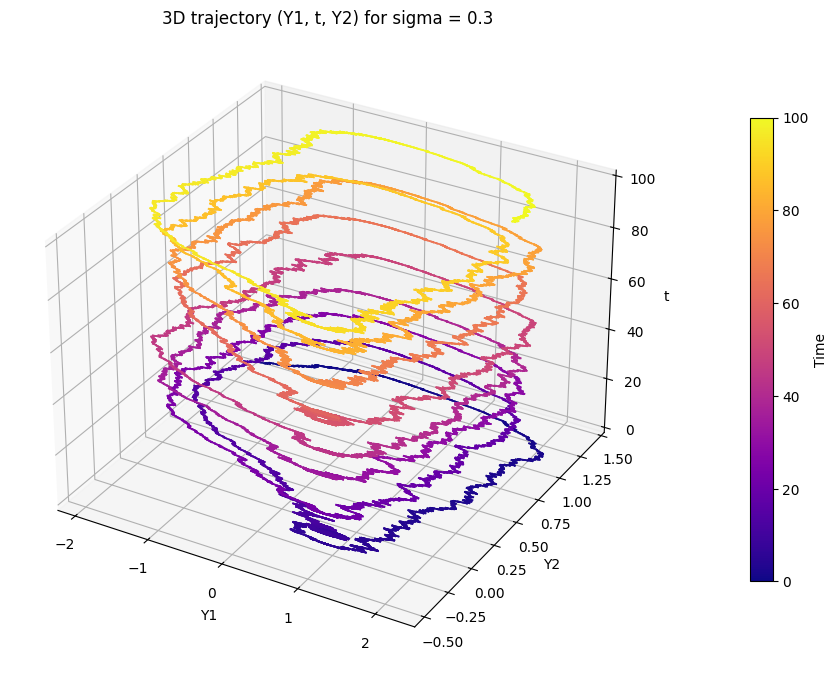

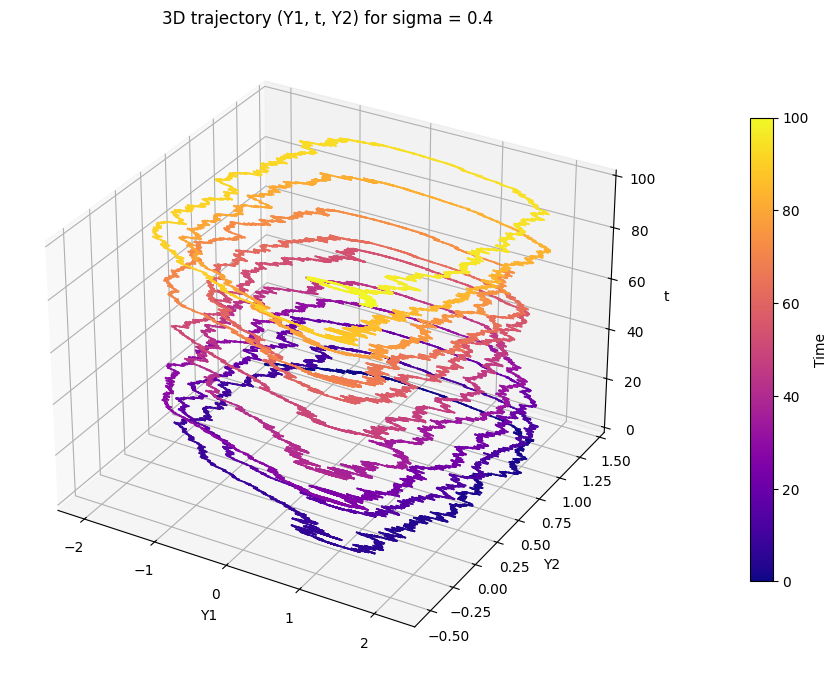

In [67]:
for sigma in sigmas:
    Y1, Y2 = simulate_sigma(sigma)
    plot_3d_time_colored(Y1, Y2, sigma)
